<a href="https://colab.research.google.com/github/Stark-developer01/Colour-Identification-in-Images/blob/main/Colour_Identification_in_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **1st Part - Colour Identification from Images using Machine Learning**

In [1]:
#Importing the libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
from google.colab.patches import cv2_imshow

%matplotlib inline

In [ ]:
#Reading, importing and plotting the image
img = cv2.imread('/content/drive/MyDrive/ML_Images/324a511fb2d414841cf6458088aa5d35.jpg') # To read any image, we use the method cv2.imread() and specify the
print("The type of the image input is {}".format(type(img)))                              # complete path of the image which gets imported into the notebook as a Numpy array
print("Shape : {}".format(img.shape))
plt.imshow(img) #By default OpenCV reads image in the BGR (Blue, Green, Red) Sequence hence the processed image after reading that is passed to plt object.
cv2_imshow(img) #Directly plotting the image which is imported though OpenCV without reading or processing it.

In [ ]:
#Converting the reading sequence from BGR to RGB Format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
#Converting the image format to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

In [ ]:
#Resizing and plotting the Image
resized_image = cv2.resize(img, (3888, 1720))
plt.imshow(resized_image)

### **Color Identification Part**

In [2]:
#Conversion from RGB Format to Hexcode format
def RGB2HEX(colour):
  return"#{:02x}{:02x}{:02x}".format(int(colour[0]), int(colour[1]), int(colour[2]))  # On reading the color which is in RGB space, we return a string, {:02x} simply displays the hex value for the respective color.

In [3]:
#Defining a method to Read Images in RGB Colour Space
def get_image(image_path):
  img = cv2.imread(image_path) #We supply the path of the image as the argument
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #First, we read the file using imread and then change its color space before returning it
  return img

[array([215.02168525, 150.27606656,  13.00115065]),
 array([30.09908179, 66.77924623, 95.98217373]),
 array([236.72918881, 203.39585547, 166.86255756]),
 array([205.33501171, 212.74039813, 226.28395785]),
 array([100.42988074, 116.58215548, 137.51303004]),
 array([42.70033786, 31.29314259,  8.25249433]),
 array([ 5.48731912, 38.15601794, 70.79546515]),
 array([139.68435736,  90.78356028,  18.21909665]),
 array([153.90774661, 169.1572219 , 195.75376836]),
 array([85.5127578 , 62.52283845, 23.80046933])]

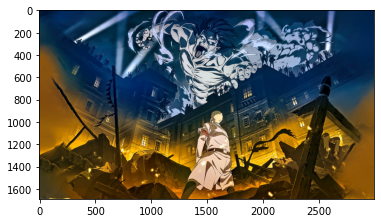

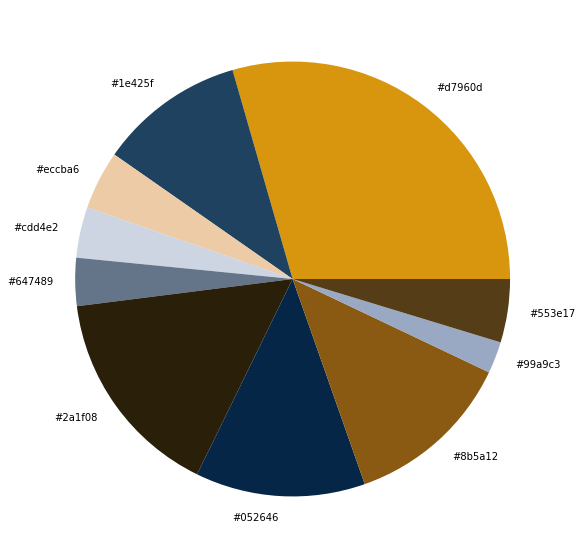

In [4]:
#Getting Colors from an Image
def get_colours(img, number_of_colors, show_chart):

  modified_img = cv2.resize(img, (600,400), interpolation = cv2.INTER_AREA) #Resizing the Image to 600x400 to lessen the pixels which’ll reduce the time needed to extract the colors from the image
  modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3) #KMeans expects the input to be of two dimensions, so we use Numpy’s reshape function to reshape the image data.

  clf = KMeans(n_clusters=number_of_colors) #KMeans algorithm creates clusters based on the supplied count of clusters
  labels = clf.fit_predict(modified_img) #We fit and predict (performing model fitting and prediction) on the same image to extract the prediction into the variable labels

  counts = Counter(labels) #We use Counter to get count of all labels

  center_colors = clf.cluster_centers_  # To find the colors, we use clf.cluster_centers_

  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()] # The ordered_colors iterates over the keys present in count, and then divides each value by 255
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()] # Now we get the hex and rgb colors
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  if (show_chart):
      plt.figure(figsize = (12, 10))
      plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)    #If show_chart is True, we plot a pie chart with each pie chart portion defined using count.values(), labels as hex_colors and colors as ordered_colors

  return rgb_colors #We finally return the rgb_colors which we’ll use at a later stage.

show_img = get_image('/content/drive/MyDrive/ML_Images/324a511fb2d414841cf6458088aa5d35.jpg')
plt.imshow(show_img)
get_colours(show_img, 10, True)

## **2nd Part - Searching Images using Colours**
Filtering a set of images based on the color we’d like. We will supply the RGB values for the colors Green, Blue, Red, Orange, Purple and Yellow and let our system filter the images.

In [25]:
# Getting alL the Images
IMAGE_DIRECTORY = '/content/drive/MyDrive/ML_Images'
COLORS = {                      
    'GREEN': [0, 128, 0],               # We define COLORS as a dictionary of colors
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED': [255, 0, 0],
    'ORANGE': [255, 165, 0],
    'PURPLE': [128, 0, 128]
}
images = []                           #Then, we read all images in that folder and save their values in the images array.

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

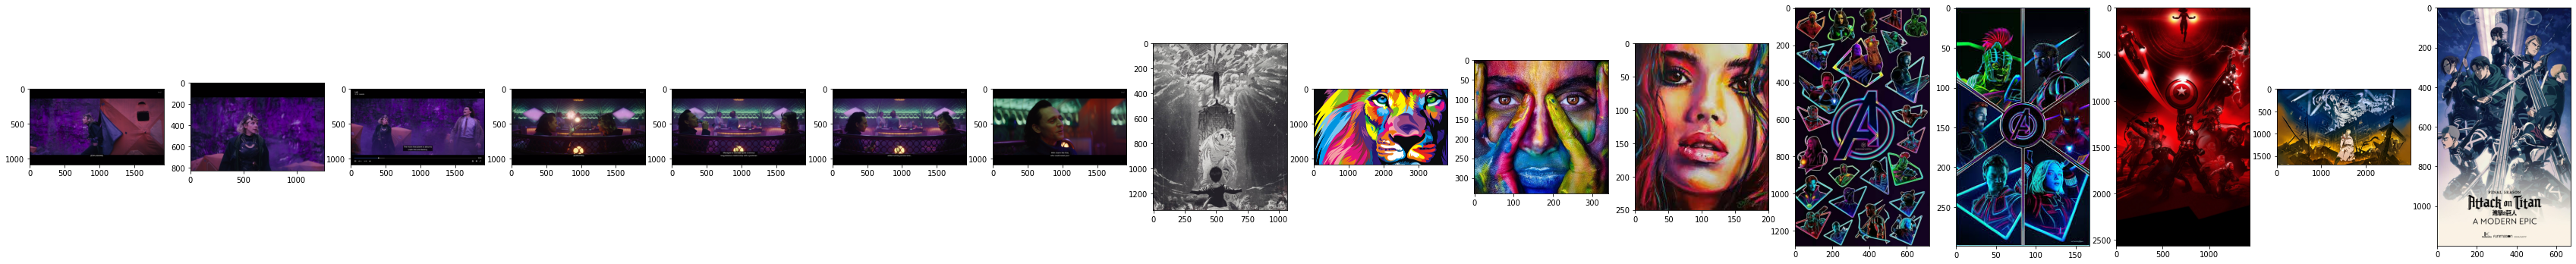

In [26]:
#Showing all the Images
plt.figure(figsize=(60, 50))
for i in range(len(images)):
    plt.subplot(2, len(images), i+1)
    plt.imshow(images[i])

### **Filtering all images that match the selected colour**

In [27]:
# Defining a method match_image_by_color to filter all images that match the selected color

def match_image_by_color(image, color, threshold = 70, number_of_colors = 10): 
    
    image_colors = get_colours(image, number_of_colors, False) # We first extract the image colors using our previously defined method get_colors in RGB format
    selected_color = rgb2lab(np.uint8(np.asarray([[color]]))) # We use the method rgb2lab to convert the selected color to a format we can compare.
                                                              # The for loop simply iterates over all the colors retrieved from the image.
    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))       #For each color, the loop changes it to lab, finds the delta (basically difference) between the selected color 
        diff = deltaE_cie76(selected_color, curr_color)                       #and the color in iteration and if the delta is less than the threshold, the image is selected as matching with the color.
        if (diff < threshold):
            select_image = True
    
    return select_image

**We need to calculate the delta and compare it to the threshold because for each color there are many shades and we cannot always exactly match the selected color with the colors in the image.**

"By saying green, the user can mean light green, green or dark green. We need to scan through all possibilities."

If we extract say 5 colors from an image, even if one color matches with the selected color, we select that image. The threshold basically defines how different can the colors of the image and selected color be.

Let’s consider the case where we are trying to find images with color Green. If the threshold is too high, we might start seeing blue images in our search. Similarly, on the other hand, if the threshold is too low, then green might not even match images that have dark green in them.

It’s all based on what is required in the situation at hand and we can modify the values accordingly. We need to carefully set the threshold value.

In [28]:
# Defining a function show_selected_images that iterates over all images, calls the above function to filter them based on color and displays them on the screen using imshow

def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 6, index)
            plt.imshow(images[i])
            index += 1

## **Filtering our Results**

We call the method as follows. We will just replace the variable selected_color with COLORS['GREEN'] for Green, COLORS['BLUE'] for Blue, COLORS['RED'] for Red, COLORS['ORANGE'] for Orange, COLORS['PURPLE'] for Purple and COLORS['YELLOW'] for Yellow. 

We set the threshold value to be 70 and total colors to be extracted from image to be 10

In [ ]:
# Variable 'selected_color' can be any of COLORS['GREEN'], COLORS['BLUE'] or COLORS['YELLOW']
plt.figure(figsize = (20, 10))

show_selected_images(images, COLORS['YELLOW'], 70, 10)